<h1 style="text-align: center;">Clustering Music Genres</h1>

## This project aims to group musical pieces into clusters based on their acoustic characteristics. Using unsupervised learning methods, we intend to identify similar music genres and optimize music selection.

### Imports and load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load Spotify dataset
df = pd.read_csv('Spotify-2000.csv')

In [3]:
df.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


## EDA - Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   object
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

In [5]:
df.columns

Index(['Index', 'Title', 'Artist', 'Top Genre', 'Year',
       'Beats Per Minute (BPM)', 'Energy', 'Danceability', 'Loudness (dB)',
       'Liveness', 'Valence', 'Length (Duration)', 'Acousticness',
       'Speechiness', 'Popularity'],
      dtype='object')

In [6]:
#check for missing values
df.isnull().sum()

Index                     0
Title                     0
Artist                    0
Top Genre                 0
Year                      0
Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

In [7]:
#select numerical audio features for clustering
features = [
    'Beats Per Minute (BPM)',
    'Energy',
    'Danceability',
    'Loudness (dB)',
    'Liveness',
    'Valence',
    'Acousticness',
    'Speechiness',
    'Popularity'
]

df_clustering = df[features]

In [8]:
df_clustering.head()

,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity
0,157,30,53,-14,11,68,94,3,71
1,135,79,50,-11,17,81,17,7,39
2,168,69,66,-9,7,52,2,17,69
3,173,96,43,-4,3,37,0,4,76
4,106,82,58,-5,10,87,1,3,59


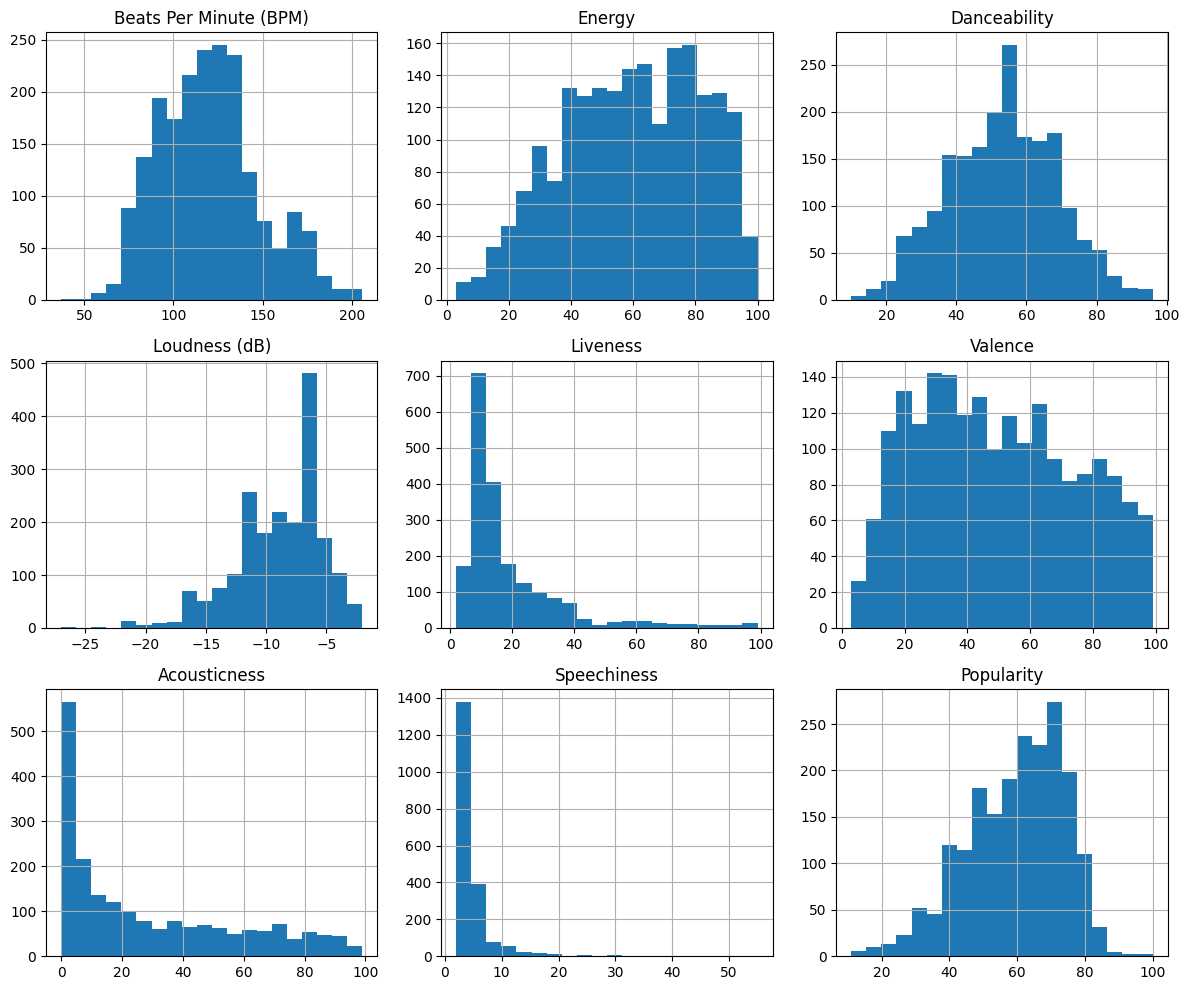

In [9]:
#plot feature 
df_clustering.hist(figsize=(12,10), bins=20)
plt.tight_layout()
plt.show()

### Preprocessing

In [10]:
#convert selected features to numpy array
X = df_clustering.values

In [11]:
from sklearn.preprocessing import StandardScaler

#initialize scaler
scaler = StandardScaler()

#fit and transform the data
X_scaled = scaler.fit_transform(X)

In [12]:
X_scaled.mean(axis=0)

array([ 3.56340389e-17,  7.83948856e-17, -1.53226367e-16,  1.85297002e-16,
        3.02889331e-17, -9.26485012e-17, -8.19582895e-17, -9.97753089e-17,
        3.56340389e-17])

In [13]:
X_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

### Modeling

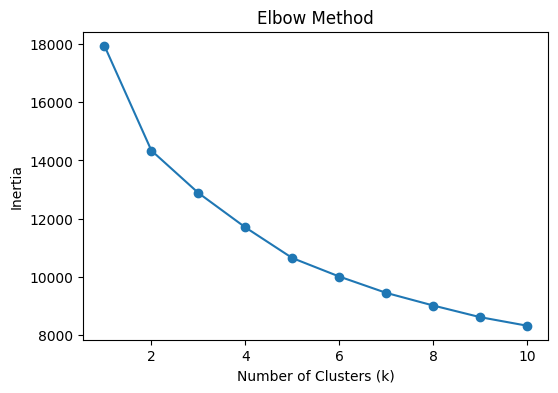

In [14]:
from sklearn.cluster import KMeans
#elbow method

inertia = []

k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

#elbow curve
plt.figure(figsize=(6,4))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

In [15]:
#pip install yellowbrick

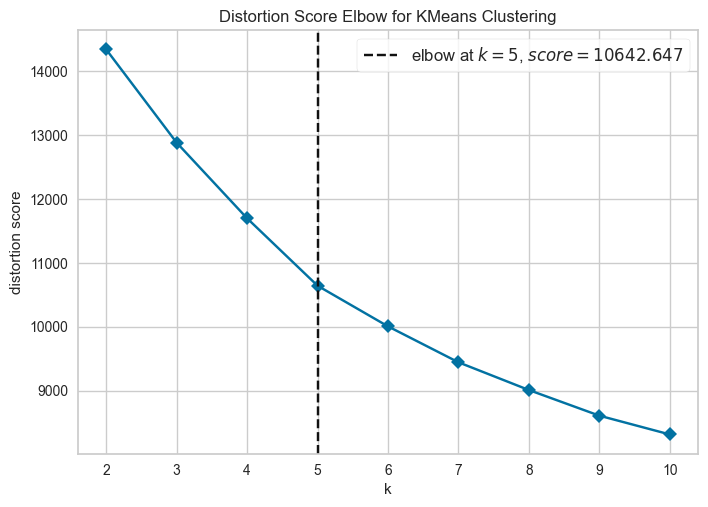

In [18]:
#elbow method using Yellowbrick
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

km = KMeans(random_state=42, n_init=10)

vis = KElbowVisualizer(
    km,
    k=(2, 11),
    metric="distortion",
    timings=False,
    force_model=True
)

vis.fit(X_scaled)
vis.show();

In [19]:
#train final KMeans model with k=5
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)

kmeans.fit(X_scaled)

#assign cluster labels
df["Cluster"] = kmeans.labels_

In [20]:
df.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity,Cluster
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71,2
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39,0
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69,3
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76,1
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59,0


In [21]:
df["Cluster"].value_counts()

Cluster
0    673
1    583
2    551
4    126
3     61
Name: count, dtype: int64

In [22]:
from sklearn.decomposition import PCA

#reduce to 2 dimensions for visualization
pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_scaled)

#create DataFrame for plotting
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["Cluster"] = df["Cluster"]

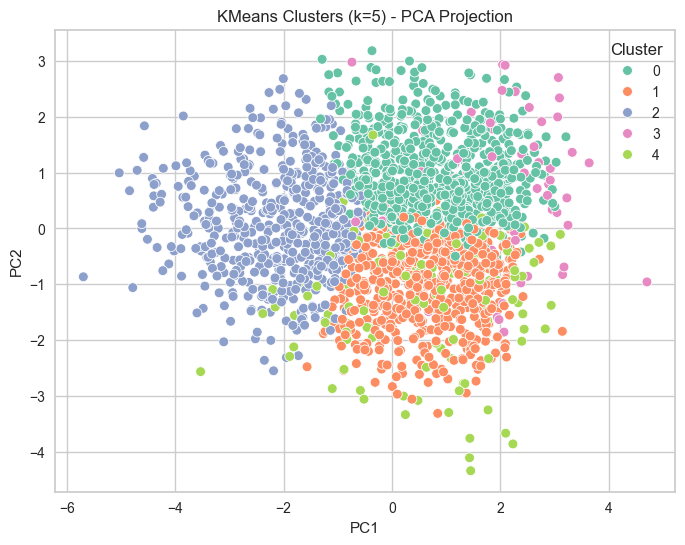

In [23]:
#plot clusters in 2D
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="PC1",
    y="PC2",
    hue="Cluster",
    palette="Set2",
    data=df_pca,
    s=50
)

plt.title("KMeans Clusters (k=5) - PCA Projection")
plt.show()

In [24]:
#calculate mean feature values per cluster
cluster_profile = df.groupby("Cluster")[features].mean()

In [25]:
cluster_profile

,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity
Cluster,,,,,,,,,
0,115.986627,66.910847,65.644874,-8.682021,14.852897,72.093611,20.802377,4.361070,62.699851
1,131.041166,73.089194,44.879931,-6.706690,17.317324,38.252144,9.915952,4.742710,58.715266
2,113.408348,33.270417,46.524501,-12.214156,14.281307,30.682396,60.000000,3.640653,57.083485
3,127.475410,70.885246,65.262295,-7.196721,17.754098,63.016393,19.098361,24.508197,67.622951
4,118.968254,69.071429,49.182540,-8.261905,70.365079,55.166667,28.071429,6.023810,53.095238


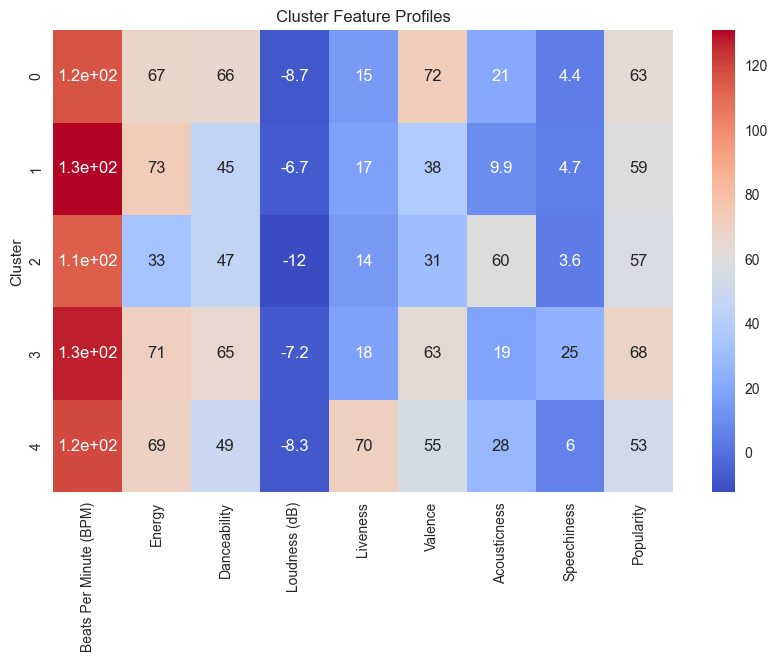

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(cluster_profile, annot=True, cmap="coolwarm")
plt.title("Cluster Feature Profiles")
plt.show()

## Conclusion: In this project, i applied KMeans clustering to group songs based on their audio features such as energy, danceability, loudness, and tempo. The Elbow method suggested an optimal number of 5 clusters. After scaling the data and applying KMeans, the PCA visualization showed partially overlapping clusters but also clear structural groupings within the dataset. Although some overlap exists, which is expected in real-world music data, the clustering results indicate meaningful segmentation of songs based on their acoustic characteristics.

In [27]:
import os
os.makedirs("models", exist_ok=True)

In [28]:
#save trained clustering model and scaler
import joblib

joblib.dump(kmeans, "models/kmeans_music_genres.joblib")
joblib.dump(scaler, "models/scaler_music_genres.joblib")

['models/scaler_music_genres.joblib']

In [29]:
#save feature name used for clustering
import json

with open("models/feature_list.json", "w") as f:
    json.dump(features, f)

In [30]:
os.listdir('models')

['feature_list.json',
 'scaler_music_genres.joblib',
 'kmeans_music_genres.joblib']